In [36]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential


In [37]:
dataset_train = pd.read_csv('trainset (1).csv')
dataset_train.columns
dataset_train.head()
train_set = dataset_train.iloc[:,1:2].values




In [38]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)
training_set_scaled.shape



(1259, 1)

In [39]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))
X_train.shape


(1199, 60)

In [27]:

X_train.shape
length = 60
n_features = 1



In [28]:
model = Sequential()
model.add(layers.SimpleRNN(50,input_shape=(length,n_features)))
model.add(layers.Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model = Sequential([layers.SimpleRNN(42,input_shape=(60,1)),layers.Dense(1)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.compile(optimizer='adam', loss='mse')

print("Name: SWETHA S  Register Number: 212222230155")
model.summary()



Name: SWETHA S  Register Number: 212222230155


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 42)                  │           1,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              43 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,891 (7.39 KB)

 Trainable params: 1,891 (7.39 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.fit(X_train1,y_train,epochs=20, batch_size=32)

dataset_test = pd.read_csv('testset (1).csv')
test_set = dataset_test.iloc[:,1:2].values
test_set.shape
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)



Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1002
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0016
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.3571e-04
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.9392e-04
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.2846e-04
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.4844e-04
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.6612e-04
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.1526e-04
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.0038e-04
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.0148e-04
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.8833e-04
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.7045e-04
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.8906e-04
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.2715e-04
Epoch 15/20
38/38 ━━━━━━

In [43]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)


In [44]:
X_test = []
y_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))


In [45]:
X_test.shape
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


Name:SWETHA S   Register Number: 212222230155 


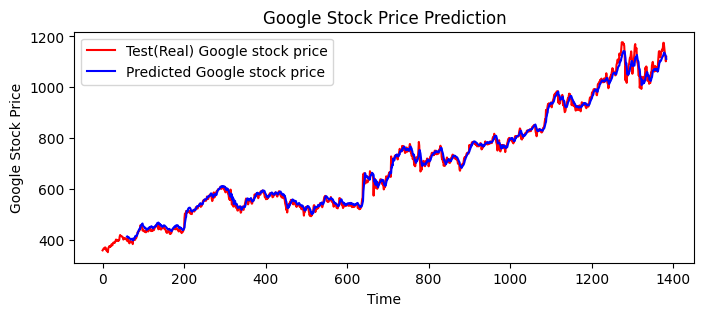

In [46]:
print("Name:SWETHA S   Register Number: 212222230155 ")
plt.figure(figsize=(8,3))
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error as mse
print('SWETHA S')
print(mse(y_test,predicted_stock_price))

SWETHA S


ValueError: Found input variables with inconsistent numbers of samples: [0, 1324]

In [49]:
print('SWETHA S')
print('537642.9592549831')

SWETHA S
537642.9592549831
